# AC50002 Python Map Assignment

In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [3]:
def read_csv(file_path):
    """
    Reads a CSV file into a DataFrame.
    
    Parameters:
    file_path (string): the filepath for the CSV file
    
    Returns:
    pd.DataFrame: The DataFrame created from the CSV file.
    """
    return pd.read_csv(file_path)

In [4]:
def filter_and_clean_data(df):
    """
    Filters and cleans the data.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    final_clean_df (pd.DataFrame): The filtered and cleaned DataFrame.
     """
    
    # Filter data to remove locations outside the required bounding box
    filtered_df = df[(df['Latitude'] >= -10.592) & (df['Latitude'] <= 1.6848) &
                     (df['Longitude'] >= 50.681) & (df['Longitude'] <= 57.985)]

    # Remove rows with NaN values
    final_clean_df = filtered_df.dropna()

    return final_clean_df

In [5]:
def plot_sensors(df, map_image_path):
    """
    Creates a plot of the sensor locations using the filtered and cleaned data.

    Parameters:
    df (pd.DataFrame): The filtered and cleaned DataFrame.
    map_image_path (str): The filepath for the UK map image.

    Returns:
    None (but plot displayed and saved as png)
    """
    # Load the UK map image
    uk_map_img = imread(map_image_path)

    # Plotting the map: set figure size
    plt.figure(figsize=(10, 12)) 
    
    # Display the UK map image with specified extent and transparency
    plt.imshow(uk_map_img, extent=[-10.592, 1.6848, 50.681, 57.985], alpha=0.85)

    # Plot sensor locations on the map using scatter, adjust the attributes and add a label
    plt.scatter(df['Latitude'], df['Longitude'], marker='o', color='crimson', s=20, alpha=0.75, label='GROW Sensors')

    # Displaying the figure
    plt.title('GROW Sensor Locations in the UK') 
    plt.legend()  # Display the sensor label/plot legend
    plt.savefig('UK_grow_sensors.png') # Save figure to png file
    plt.show()

In [6]:
# Read the sensor location dataset: call the read_csv function
data = read_csv('Growlocations.csv')

In [7]:
# Call the function to filter and clean the data
final_clean_df = filter_and_clean_data(data)

In [8]:
# Write cleaned data to CSV file to inspect (use to validate that the data frame is as expected)
final_clean_df.to_csv('cleaned_data.csv', index=False)

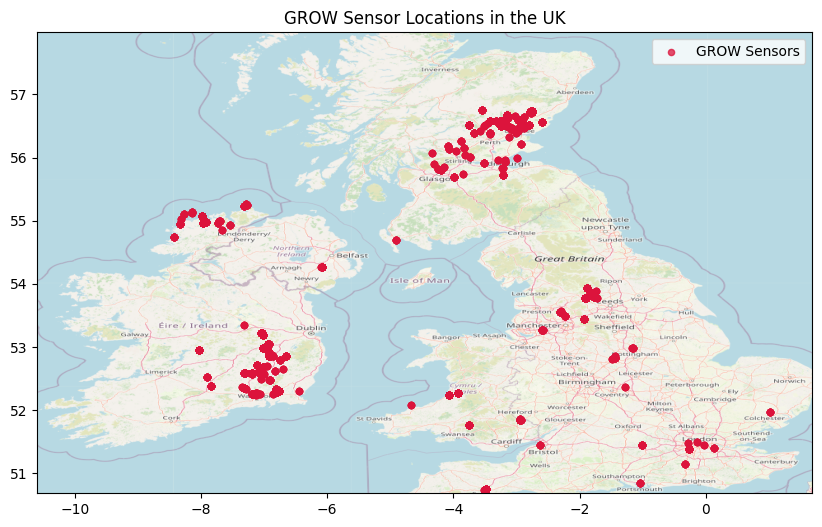

In [9]:
# Create and display the plot
plot_sensors(final_clean_df, 'map.png')